In [108]:
# import our dependencies

%matplotlib inline
from collections import Counter
import pandas as pd
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import numpy as np
import os

## PCA + Oversampling (Random Oversampling) + Logistic Regression (SFRs)

In [109]:
file = 'West_Hollywood_Cleaned.csv'

location = '/Users/Admin/Desktop/GW_Bootcamp/Analysis_Projects/Final_Project_Team_1/'

In [110]:
path = os.path.join(location, file)

In [111]:
# bring in our dataframe

West_Hollywood_df = pd.read_csv(path, index_col='PARCEL')
West_Hollywood_df.head()

,Owned by Trust?,Owned by Business?,SITEADDRESS,MAIL DIFFERENT FROM SITE?,MAIL OUTSIDE CA?,TITLECO1,ASSDTOTAL,ASSDLAND,ASSDSTCT,ASSDOTHR,...,Other,PARTNERSHIP,QUIT CLAIM,RE-RECORD,RECEIVERS DEED,SPECIAL WARRANTY,TAX DEED,TRUST TRANSFER,TRUSTEES,WARRANTY
PARCEL,,,,,,,,,,,,,,,,,,,,,
5529008006,0,1,8323 Willoughby Ave,0,0,0,83200,72198,0,0,...,0,0,0,0,0,0,0,0,0,0
4340015017,0,0,8998 Lloyd Pl,0,0,0,359300,203245,0,0,...,0,0,0,0,0,0,0,0,0,0
5531004052,0,0,1207 Greenacre Ave,1,0,0,318800,199313,0,0,...,0,0,0,0,0,0,0,0,0,0
4336004003,0,0,8756 Dorrington Ave,0,0,0,453200,357404,0,0,...,0,0,0,0,0,0,0,0,0,0
5529017005,1,0,930 N La Jolla Ave,0,0,0,538600,389916,0,0,...,0,0,0,0,0,0,0,0,0,0


In [112]:
# drop any nulls

West_Hollywood_df = West_Hollywood_df.dropna()

In [113]:
len(West_Hollywood_df)

6380

In [114]:
# Change the datatype of these two columns into ints

West_Hollywood_df['TAXAMT'] = West_Hollywood_df['TAXAMT'].astype(int)
West_Hollywood_df['EFFYRBLT'] = West_Hollywood_df['EFFYRBLT'].astype(int)

In [115]:
# Make sure our dataframe is only SFR's so exclude every property that has an '#' in its site address

West_Hollywood_df = West_Hollywood_df[~West_Hollywood_df['SITEADDRESS'].str.contains('#')]
West_Hollywood_df.head(3)

,Owned by Trust?,Owned by Business?,SITEADDRESS,MAIL DIFFERENT FROM SITE?,MAIL OUTSIDE CA?,TITLECO1,ASSDTOTAL,ASSDLAND,ASSDSTCT,ASSDOTHR,...,Other,PARTNERSHIP,QUIT CLAIM,RE-RECORD,RECEIVERS DEED,SPECIAL WARRANTY,TAX DEED,TRUST TRANSFER,TRUSTEES,WARRANTY
PARCEL,,,,,,,,,,,,,,,,,,,,,
5529008006,0,1,8323 Willoughby Ave,0,0,0,83200,72198,0,0,...,0,0,0,0,0,0,0,0,0,0
4340015017,0,0,8998 Lloyd Pl,0,0,0,359300,203245,0,0,...,0,0,0,0,0,0,0,0,0,0
5531004052,0,0,1207 Greenacre Ave,1,0,0,318800,199313,0,0,...,0,0,0,0,0,0,0,0,0,0


In [116]:
len(West_Hollywood_df)

1128

In [117]:
# Now drop the SiteAddress column
West_Hollywood_df.drop(['SITEADDRESS'], axis=1, inplace=True)

In [118]:
West_Hollywood_df.head(3)

,Owned by Trust?,Owned by Business?,MAIL DIFFERENT FROM SITE?,MAIL OUTSIDE CA?,TITLECO1,ASSDTOTAL,ASSDLAND,ASSDSTCT,ASSDOTHR,EXEMPTCD,...,Other,PARTNERSHIP,QUIT CLAIM,RE-RECORD,RECEIVERS DEED,SPECIAL WARRANTY,TAX DEED,TRUST TRANSFER,TRUSTEES,WARRANTY
PARCEL,,,,,,,,,,,,,,,,,,,,,
5529008006,0,1,0,0,0,83200,72198,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4340015017,0,0,0,0,0,359300,203245,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5531004052,0,0,1,0,0,318800,199313,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [119]:
# Step 1: Create our X and y

y = West_Hollywood_df['Did it sell?']
X = West_Hollywood_df.drop(['Did it sell?'], 1)

In [120]:
APN = West_Hollywood_df.index.values
APN

array([5529008006, 4340015017, 5531004052, ..., 5554012043, 5554012038,
       5554012051])

In [121]:
# Step 2: Use PCA to reduce dimension to three principal components.
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

In [122]:
X_pca

array([[-883763.02136271, -389713.43939827,  -34934.41775827],
       [-591340.97835579, -300900.34265914,  -32938.27897074],
       [-631976.56758082, -298811.4909254 ,  -32887.79353162],
       ...,
       [-485606.22543633, -165344.47916255,    3781.7912153 ],
       [-684050.11180634, -334306.84490454,    9241.36744772],
       [-276825.95640811,  -32497.1643672 ,  316564.93125094]])

In [123]:
# Step 3: Train, test, split

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, random_state=78, stratify=y)

In [124]:
# Step 4: Scale our data

# Create the StandardScaler instance
scaler = StandardScaler()

# Fit our scaler, named 'scaler' to our data, which produces a new StandardScaler object
# which we call 'X_scaler'
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [125]:
X_train_scaled_APN = []

In [126]:
# implement random oversampling
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=1)
X_random_oversampled, y_random_oversampled = ros.fit_resample(X_train_scaled, y_train)

Counter(y_random_oversampled)

Counter({0: 727, 1: 727})

In [127]:
# Logistic regression using random oversampled data
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs', 
                                max_iter=300,
                                random_state=78,
                                class_weight="balanced")

model.fit(X_random_oversampled, y_random_oversampled)

LogisticRegression(class_weight='balanced', max_iter=300, random_state=78)

In [128]:
# Evaluate the model
y_pred = model.predict(X_test_scaled)

In [129]:
print(f" Logistic regression model accuracy: {accuracy_score(y_test, y_pred):.3f}")

 Logistic regression model accuracy: 0.521


In [130]:
# just for shits n' gigs, lets find the balanced accuracy score

from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y_test, y_pred)

0.5228305785123968

In [131]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average="weighted")

0.5924571658601631

In [132]:
# create our confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[126, 116],
       [ 19,  21]])

In [133]:
cm_RandomForest = confusion_matrix(y_test, y_pred)
cm_RandomForest_df = pd.DataFrame(
    cm_RandomForest, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

In [134]:
# Displaying results
print("Confusion Matrix")
display(cm_RandomForest_df)

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,126,116
Actual 1,19,21


In [29]:
# Print the imbalanced classification report
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.87      0.52      0.53      0.65      0.52      0.27       242
          1       0.15      0.53      0.52      0.24      0.52      0.27        40

avg / total       0.77      0.52      0.52      0.59      0.52      0.27       282



In [30]:
results = pd.DataFrame({"Prediction": y_pred, "Actual": y_test, "PARCEL": y_test.index.values}).reset_index(drop=True)
results.sample(20)

,Prediction,Actual,PARCEL
47,0,0,5531005011
104,0,1,4340023023
173,0,1,4339018014
162,0,0,5531005039
45,0,0,5531006029
148,1,0,4336003021
91,0,0,4340018037
178,1,0,4337010002
32,1,0,4336015017
110,0,0,4336015015


In [31]:
West_Hollywood_Results_SFRs_df = West_Hollywood_df.merge(results, how="left", right_on="PARCEL", left_on="PARCEL")
West_Hollywood_Results_SFRs_df.head()

,PARCEL,Owned by Trust?,Owned by Business?,MAIL DIFFERENT FROM SITE?,MAIL OUTSIDE CA?,TITLECO1,ASSDTOTAL,ASSDLAND,ASSDSTCT,ASSDOTHR,...,QUIT CLAIM,RE-RECORD,RECEIVERS DEED,SPECIAL WARRANTY,TAX DEED,TRUST TRANSFER,TRUSTEES,WARRANTY,Prediction,Actual
0,5529008006,0,1,0,0,0,83200,72198,0,0,...,0,0,0,0,0,0,0,0,NaN,NaN
1,4340015017,0,0,0,0,0,359300,203245,0,0,...,0,0,0,0,0,0,0,0,NaN,NaN
2,5531004052,0,0,1,0,0,318800,199313,0,0,...,0,0,0,0,0,0,0,0,NaN,NaN
3,4336004003,0,0,0,0,0,453200,357404,0,0,...,0,0,0,0,0,0,0,0,0.0,0.0
4,5529017005,1,0,0,0,0,538600,389916,0,0,...,0,0,0,0,0,0,0,0,NaN,NaN


In [32]:
West_Hollywood_Results_SFRs_df = pd.DataFrame(West_Hollywood_Results_SFRs_df, columns = ['PARCEL', 'Did it sell?', 'Prediction', 'Actual'])
West_Hollywood_Results_SFRs_df.head()

,PARCEL,Did it sell?,Prediction,Actual
0,5529008006,0,NaN,NaN
1,4340015017,0,NaN,NaN
2,5531004052,0,NaN,NaN
3,4336004003,0,0.0,0.0
4,5529017005,1,NaN,NaN


In [33]:
West_Hollywood_Results_SFRs_df.to_csv('West_Hollywood_Results_SFRs.csv')

## PCA + Oversampling (Random Oversampling) + Logistic Regression (SFRs) w/ feature reduction

In [157]:
file = 'West_Hollywood_Cleaned.csv'

location = '/Users/Admin/Desktop/GW_Bootcamp/Analysis_Projects/Final_Project_Team_1/'

In [158]:
path = os.path.join(location, file)

In [159]:
# bring in our dataframe

West_Hollywood_df = pd.read_csv(path, index_col='PARCEL')
West_Hollywood_df.head()

,Owned by Trust?,Owned by Business?,SITEADDRESS,MAIL DIFFERENT FROM SITE?,MAIL OUTSIDE CA?,TITLECO1,ASSDTOTAL,ASSDLAND,ASSDSTCT,ASSDOTHR,...,Other,PARTNERSHIP,QUIT CLAIM,RE-RECORD,RECEIVERS DEED,SPECIAL WARRANTY,TAX DEED,TRUST TRANSFER,TRUSTEES,WARRANTY
PARCEL,,,,,,,,,,,,,,,,,,,,,
5529008006,0,1,8323 Willoughby Ave,0,0,0,83200,72198,0,0,...,0,0,0,0,0,0,0,0,0,0
4340015017,0,0,8998 Lloyd Pl,0,0,0,359300,203245,0,0,...,0,0,0,0,0,0,0,0,0,0
5531004052,0,0,1207 Greenacre Ave,1,0,0,318800,199313,0,0,...,0,0,0,0,0,0,0,0,0,0
4336004003,0,0,8756 Dorrington Ave,0,0,0,453200,357404,0,0,...,0,0,0,0,0,0,0,0,0,0
5529017005,1,0,930 N La Jolla Ave,0,0,0,538600,389916,0,0,...,0,0,0,0,0,0,0,0,0,0


In [160]:
# drop any nulls

West_Hollywood_df = West_Hollywood_df.dropna()

In [161]:
len(West_Hollywood_df)

6380

In [162]:
# Change the datatype of these two columns into ints

West_Hollywood_df['TAXAMT'] = West_Hollywood_df['TAXAMT'].astype(int)
West_Hollywood_df['EFFYRBLT'] = West_Hollywood_df['EFFYRBLT'].astype(int)

In [163]:
# Make sure our dataframe is only SFR's so exclude every property that has an '#' in its site address

West_Hollywood_df = West_Hollywood_df[~West_Hollywood_df['SITEADDRESS'].str.contains('#')]
West_Hollywood_df.head(3)

,Owned by Trust?,Owned by Business?,SITEADDRESS,MAIL DIFFERENT FROM SITE?,MAIL OUTSIDE CA?,TITLECO1,ASSDTOTAL,ASSDLAND,ASSDSTCT,ASSDOTHR,...,Other,PARTNERSHIP,QUIT CLAIM,RE-RECORD,RECEIVERS DEED,SPECIAL WARRANTY,TAX DEED,TRUST TRANSFER,TRUSTEES,WARRANTY
PARCEL,,,,,,,,,,,,,,,,,,,,,
5529008006,0,1,8323 Willoughby Ave,0,0,0,83200,72198,0,0,...,0,0,0,0,0,0,0,0,0,0
4340015017,0,0,8998 Lloyd Pl,0,0,0,359300,203245,0,0,...,0,0,0,0,0,0,0,0,0,0
5531004052,0,0,1207 Greenacre Ave,1,0,0,318800,199313,0,0,...,0,0,0,0,0,0,0,0,0,0


In [164]:
len(West_Hollywood_df)

1128

In [165]:
# Now drop the SiteAddress column
West_Hollywood_df.drop(['SITEADDRESS'], axis=1, inplace=True)

In [166]:
West_Hollywood_df.head(3)

,Owned by Trust?,Owned by Business?,MAIL DIFFERENT FROM SITE?,MAIL OUTSIDE CA?,TITLECO1,ASSDTOTAL,ASSDLAND,ASSDSTCT,ASSDOTHR,EXEMPTCD,...,Other,PARTNERSHIP,QUIT CLAIM,RE-RECORD,RECEIVERS DEED,SPECIAL WARRANTY,TAX DEED,TRUST TRANSFER,TRUSTEES,WARRANTY
PARCEL,,,,,,,,,,,,,,,,,,,,,
5529008006,0,1,0,0,0,83200,72198,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4340015017,0,0,0,0,0,359300,203245,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5531004052,0,0,1,0,0,318800,199313,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [167]:
West_Hollywood_df['PARCEL_1'] = West_Hollywood_df.index.values

In [168]:
West_Hollywood_df = pd.DataFrame(West_Hollywood_df, columns = ['LOTSQFT',
                    'ASSDTOTAL', 'ASSDLAND', 'TOTALSF', 'PARCEL_1', 'DOCDATE_YEAR',
                    'YEARBLT', 'EFFYRBLT', 'BATHROOMS', 'MAIL DIFFERENT FROM SITE?',
                    'BEDROOMS', 'POOL', 'Owned by Trust?', 'Owned by Business?',
                    'TOTUNITS', 'NOSTORY', 'Did it sell?'])

In [169]:
West_Hollywood_df

,LOTSQFT,ASSDTOTAL,ASSDLAND,TOTALSF,PARCEL_1,DOCDATE_YEAR,YEARBLT,EFFYRBLT,BATHROOMS,MAIL DIFFERENT FROM SITE?,BEDROOMS,POOL,Owned by Trust?,Owned by Business?,TOTUNITS,NOSTORY,Did it sell?
PARCEL,,,,,,,,,,,,,,,,,
5529008006,7500,83200,72198,1664,5529008006,1968,1951,1951,2,0,3,1,0,1,1,1.0,0
4340015017,3864,359300,203245,1153,4340015017,1979,1927,1927,1,0,2,1,0,0,1,1.0,0
5531004052,5257,318800,199313,1359,5531004052,1997,1940,1940,2,1,2,1,0,0,1,1.0,0
4336004003,4597,453200,357404,1033,4336004003,1986,1927,1927,1,0,2,1,0,0,1,1.0,0
5529017005,6550,538600,389916,1596,5529017005,1992,1924,1924,2,0,3,1,1,0,1,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5554012048,22220,141299,64965,1317,5554012048,2008,1925,1935,1,0,2,0,1,0,1,0.0,0
5554012049,22220,615790,307383,1192,5554012049,2013,1925,1935,1,1,2,0,0,1,1,0.0,1
5554012043,22220,443569,354857,929,5554012043,2016,1925,1935,1,1,2,0,0,0,1,0.0,1


In [170]:
# Create our X and y

y = West_Hollywood_df['Did it sell?']
X = West_Hollywood_df.drop(['Did it sell?'], 1)

In [171]:
APN = West_Hollywood_df.index.values
APN

array([5529008006, 4340015017, 5531004052, ..., 5554012043, 5554012038,
       5554012051])

In [93]:
# Step 2: Use PCA to reduce dimension to three principal components.
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

In [94]:
X_pca

array([[ 8.11511140e+08, -5.91597625e+05, -3.17402549e+05],
       [-3.77481881e+08, -7.26926491e+05, -3.36358070e+05],
       [ 8.13507087e+08, -3.39154208e+05, -2.26119400e+05],
       ...,
       [ 8.36515011e+08, -1.84592840e+05, -8.85287182e+04],
       [ 8.36515093e+08, -3.82922265e+05, -2.57162740e+05],
       [ 8.36514932e+08,  2.41611240e+04,  4.99295932e+04]])

In [95]:
# Step 3: Train, test, split

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, random_state=78, stratify=y)

In [96]:
# Step 4: Scale our data

# Create the StandardScaler instance
scaler = StandardScaler()

# Fit our scaler, named 'scaler' to our data, which produces a new StandardScaler object
# which we call 'X_scaler'
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [97]:
X_train_scaled_APN = []

In [98]:
# implement random oversampling
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=1)
X_random_oversampled, y_random_oversampled = ros.fit_resample(X_train_scaled, y_train)

Counter(y_random_oversampled)

Counter({0: 727, 1: 727})

In [99]:
# Logistic regression using random oversampled data
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs', 
                                max_iter=300,
                                random_state=78,
                                class_weight="balanced")

model.fit(X_random_oversampled, y_random_oversampled)

LogisticRegression(class_weight='balanced', max_iter=300, random_state=78)

In [100]:
# Evaluate the model
y_pred = model.predict(X_test_scaled)

In [101]:
print(f" Logistic regression model accuracy: {accuracy_score(y_test, y_pred):.3f}")

 Logistic regression model accuracy: 0.493


In [102]:
# just for shits n' gigs, lets find the balanced accuracy score

from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y_test, y_pred)

0.5167355371900827

In [103]:
f1_score(y_test, y_pred, average="weighted")

0.5660236214808742

In [104]:
# Print the imbalanced classification report
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.87      0.48      0.55      0.62      0.52      0.26       242
          1       0.15      0.55      0.48      0.24      0.52      0.27        40

avg / total       0.76      0.49      0.54      0.57      0.52      0.26       282



In [105]:
# create our confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[117, 125],
       [ 18,  22]])

In [106]:
cm_RandomForest = confusion_matrix(y_test, y_pred)
cm_RandomForest_df = pd.DataFrame(
    cm_RandomForest, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

In [107]:
# Displaying results
print("Confusion Matrix")
display(cm_RandomForest_df)

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,117,125
Actual 1,18,22


# PCA + Oversampling (Random Oversampling) + Logistic Regression (Condos)

In [135]:
# bring in our dataframe

West_Hollywood_df = pd.read_csv(path, index_col='PARCEL')
West_Hollywood_df.head()

,Owned by Trust?,Owned by Business?,SITEADDRESS,MAIL DIFFERENT FROM SITE?,MAIL OUTSIDE CA?,TITLECO1,ASSDTOTAL,ASSDLAND,ASSDSTCT,ASSDOTHR,...,Other,PARTNERSHIP,QUIT CLAIM,RE-RECORD,RECEIVERS DEED,SPECIAL WARRANTY,TAX DEED,TRUST TRANSFER,TRUSTEES,WARRANTY
PARCEL,,,,,,,,,,,,,,,,,,,,,
5529008006,0,1,8323 Willoughby Ave,0,0,0,83200,72198,0,0,...,0,0,0,0,0,0,0,0,0,0
4340015017,0,0,8998 Lloyd Pl,0,0,0,359300,203245,0,0,...,0,0,0,0,0,0,0,0,0,0
5531004052,0,0,1207 Greenacre Ave,1,0,0,318800,199313,0,0,...,0,0,0,0,0,0,0,0,0,0
4336004003,0,0,8756 Dorrington Ave,0,0,0,453200,357404,0,0,...,0,0,0,0,0,0,0,0,0,0
5529017005,1,0,930 N La Jolla Ave,0,0,0,538600,389916,0,0,...,0,0,0,0,0,0,0,0,0,0


In [136]:
# drop any nulls

West_Hollywood_df = West_Hollywood_df.dropna()

In [137]:
len(West_Hollywood_df)

6380

In [138]:
# Change the datatype of these two columns into ints

West_Hollywood_df['TAXAMT'] = West_Hollywood_df['TAXAMT'].astype(int)
West_Hollywood_df['EFFYRBLT'] = West_Hollywood_df['EFFYRBLT'].astype(int)

In [139]:
# Make sure our dataframe is only Condos

West_Hollywood_df = West_Hollywood_df[West_Hollywood_df['SITEADDRESS'].str.contains('#')]
West_Hollywood_df.head(3)

,Owned by Trust?,Owned by Business?,SITEADDRESS,MAIL DIFFERENT FROM SITE?,MAIL OUTSIDE CA?,TITLECO1,ASSDTOTAL,ASSDLAND,ASSDSTCT,ASSDOTHR,...,Other,PARTNERSHIP,QUIT CLAIM,RE-RECORD,RECEIVERS DEED,SPECIAL WARRANTY,TAX DEED,TRUST TRANSFER,TRUSTEES,WARRANTY
PARCEL,,,,,,,,,,,,,,,,,,,,,
5554025186,0,0,1123 N Flores St #21,0,0,1,617170,408876,208294,0,...,0,0,0,0,0,0,0,0,0,0
5554020145,0,0,1200 N Sweetzer Ave #9,0,0,1,852802,533001,319801,0,...,0,0,0,0,0,0,0,0,0,0
5555004108,0,0,1137 Hacienda Pl #107,0,0,1,653187,418040,235147,0,...,0,0,0,0,0,0,0,0,0,0


In [140]:
len(West_Hollywood_df)

5252

In [141]:
# Now drop the SiteAddress column
West_Hollywood_df.drop(['SITEADDRESS'], axis=1, inplace=True)

In [142]:
West_Hollywood_df.head(3)

,Owned by Trust?,Owned by Business?,MAIL DIFFERENT FROM SITE?,MAIL OUTSIDE CA?,TITLECO1,ASSDTOTAL,ASSDLAND,ASSDSTCT,ASSDOTHR,EXEMPTCD,...,Other,PARTNERSHIP,QUIT CLAIM,RE-RECORD,RECEIVERS DEED,SPECIAL WARRANTY,TAX DEED,TRUST TRANSFER,TRUSTEES,WARRANTY
PARCEL,,,,,,,,,,,,,,,,,,,,,
5554025186,0,0,0,0,1,617170,408876,208294,0,0,...,0,0,0,0,0,0,0,0,0,0
5554020145,0,0,0,0,1,852802,533001,319801,0,1,...,0,0,0,0,0,0,0,0,0,0
5555004108,0,0,0,0,1,653187,418040,235147,0,0,...,0,0,0,0,0,0,0,0,0,0


In [143]:
# Step 1: Create our X and y

y = West_Hollywood_df['Did it sell?']
X = West_Hollywood_df.drop(['Did it sell?'], 1)

In [144]:
APN = West_Hollywood_df.index.values
APN

array([5554025186, 5554020145, 5555004108, ..., 5560023079, 5554008098,
       5554008097])

In [145]:
# Step 2: Use PCA to reduce dimension to three principal components.
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

In [146]:
X_pca

array([[ 324992.12868224,  -33627.16100337,  173726.38599696],
       [ 663124.69830341, -151616.68574151,  109308.06170405],
       [ 727427.64983627,  112762.84949707,  482646.97982207],
       ...,
       [ 199267.26054695,   25593.95483372,  160751.61574812],
       [-143691.14265002,  115350.04376565,   61719.15162262],
       [-340592.00870213,  197130.33101405,    5569.68117715]])

In [147]:
# Step 3: Train, test, split

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, random_state=78, stratify=y)

In [148]:
# Step 4: Scale our data

# Create the StandardScaler instance
scaler = StandardScaler()

# Fit our scaler, named 'scaler' to our data, which produces a new StandardScaler object
# which we call 'X_scaler'
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [149]:
X_train_scaled_APN = []

In [150]:
# implement random oversampling
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=1)
X_random_oversampled, y_random_oversampled = ros.fit_resample(X_train_scaled, y_train)

Counter(y_random_oversampled)

Counter({0: 3308, 1: 3308})

In [151]:
# Logistic regression using random oversampled data
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs', 
                                max_iter=300,
                                random_state=78,
                                class_weight="balanced")

model.fit(X_random_oversampled, y_random_oversampled)

LogisticRegression(class_weight='balanced', max_iter=300, random_state=78)

In [152]:
# Evaluate the model
y_pred = model.predict(X_test_scaled)

In [153]:
print(f" Logistic regression model accuracy: {accuracy_score(y_test, y_pred):.3f}")

 Logistic regression model accuracy: 0.605


In [154]:
# just for shits n' gigs, lets find the balanced accuracy score

from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y_test, y_pred)

0.5396515995337392

In [155]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average="weighted")

0.6559119596623073

In [156]:
# create our confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[702, 401],
       [117,  93]])

In [55]:
# Print the imbalanced classification report
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.86      0.64      0.44      0.73      0.53      0.29      1103
          1       0.19      0.44      0.64      0.26      0.53      0.28       210

avg / total       0.75      0.61      0.47      0.66      0.53      0.29      1313



In [56]:
results = pd.DataFrame({"Prediction": y_pred, "Actual": y_test, "PARCEL": y_test.index.values}).reset_index(drop=True)
results.sample(20)

,Prediction,Actual,PARCEL
870,0,0,4340018084
606,1,1,4340023076
1210,0,0,5529001118
133,1,0,4340014073
761,1,0,4339019043
392,1,0,4340028057
502,1,1,4340006103
248,0,0,5529005094
905,0,0,5529005090
1251,0,0,5529005157


In [57]:
West_Hollywood_Results_Condos_df = West_Hollywood_df.merge(results, how="left", right_on="PARCEL", left_on="PARCEL")
West_Hollywood_Results_Condos_df.head()

,PARCEL,Owned by Trust?,Owned by Business?,MAIL DIFFERENT FROM SITE?,MAIL OUTSIDE CA?,TITLECO1,ASSDTOTAL,ASSDLAND,ASSDSTCT,ASSDOTHR,...,QUIT CLAIM,RE-RECORD,RECEIVERS DEED,SPECIAL WARRANTY,TAX DEED,TRUST TRANSFER,TRUSTEES,WARRANTY,Prediction,Actual
0,5554025186,0,0,0,0,1,617170,408876,208294,0,...,0,0,0,0,0,0,0,0,NaN,NaN
1,5554020145,0,0,0,0,1,852802,533001,319801,0,...,0,0,0,0,0,0,0,0,NaN,NaN
2,5555004108,0,0,0,0,1,653187,418040,235147,0,...,0,0,0,0,0,0,0,0,1.0,0.0
3,4340011022,0,0,1,0,1,1025000,542200,482800,0,...,0,0,0,0,0,0,0,0,NaN,NaN
4,4340027180,0,0,1,0,1,1023354,756033,267321,0,...,0,0,0,0,0,0,0,0,1.0,0.0


In [59]:
West_Hollywood_Results_Condos_df = pd.DataFrame(West_Hollywood_Results_Condos_df, columns = ['PARCEL', 'Did it sell?', 'Prediction', 'Actual'])
West_Hollywood_Results_Condos_df.head()

,PARCEL,Did it sell?,Prediction,Actual
0,5554025186,0,NaN,NaN
1,5554020145,1,NaN,NaN
2,5555004108,0,1.0,0.0
3,4340011022,0,NaN,NaN
4,4340027180,0,1.0,0.0


In [60]:
West_Hollywood_Results_Condos_df.to_csv('West_Hollywood_Results_Condos.csv')

# Now lets find the discrepencies

In [187]:
file = 'West_Hollywood_Cleaned.csv'

location = '/Users/Admin/Desktop/GW_Bootcamp/Analysis_Projects/Final_Project_Team_1/'

In [188]:
path = os.path.join(location, file)

In [189]:
# bring in our dataframe

West_Hollywood_df = pd.read_csv(path, index_col='PARCEL')
West_Hollywood_df.head()

,Owned by Trust?,Owned by Business?,SITEADDRESS,MAIL DIFFERENT FROM SITE?,MAIL OUTSIDE CA?,TITLECO1,ASSDTOTAL,ASSDLAND,ASSDSTCT,ASSDOTHR,...,Other,PARTNERSHIP,QUIT CLAIM,RE-RECORD,RECEIVERS DEED,SPECIAL WARRANTY,TAX DEED,TRUST TRANSFER,TRUSTEES,WARRANTY
PARCEL,,,,,,,,,,,,,,,,,,,,,
5529008006,0,1,8323 Willoughby Ave,0,0,0,83200,72198,0,0,...,0,0,0,0,0,0,0,0,0,0
4340015017,0,0,8998 Lloyd Pl,0,0,0,359300,203245,0,0,...,0,0,0,0,0,0,0,0,0,0
5531004052,0,0,1207 Greenacre Ave,1,0,0,318800,199313,0,0,...,0,0,0,0,0,0,0,0,0,0
4336004003,0,0,8756 Dorrington Ave,0,0,0,453200,357404,0,0,...,0,0,0,0,0,0,0,0,0,0
5529017005,1,0,930 N La Jolla Ave,0,0,0,538600,389916,0,0,...,0,0,0,0,0,0,0,0,0,0


In [190]:
# drop any nulls

West_Hollywood_df = West_Hollywood_df.dropna()

In [191]:
# Change the datatype of these two columns into ints

West_Hollywood_df['TAXAMT'] = West_Hollywood_df['TAXAMT'].astype(int)
West_Hollywood_df['EFFYRBLT'] = West_Hollywood_df['EFFYRBLT'].astype(int)

In [192]:
# Make sure our dataframe is only SFR's so exclude every property that has an '#' in its site address

West_Hollywood_df = West_Hollywood_df[~West_Hollywood_df['SITEADDRESS'].str.contains('#')]
West_Hollywood_df.head(3)

,Owned by Trust?,Owned by Business?,SITEADDRESS,MAIL DIFFERENT FROM SITE?,MAIL OUTSIDE CA?,TITLECO1,ASSDTOTAL,ASSDLAND,ASSDSTCT,ASSDOTHR,...,Other,PARTNERSHIP,QUIT CLAIM,RE-RECORD,RECEIVERS DEED,SPECIAL WARRANTY,TAX DEED,TRUST TRANSFER,TRUSTEES,WARRANTY
PARCEL,,,,,,,,,,,,,,,,,,,,,
5529008006,0,1,8323 Willoughby Ave,0,0,0,83200,72198,0,0,...,0,0,0,0,0,0,0,0,0,0
4340015017,0,0,8998 Lloyd Pl,0,0,0,359300,203245,0,0,...,0,0,0,0,0,0,0,0,0,0
5531004052,0,0,1207 Greenacre Ave,1,0,0,318800,199313,0,0,...,0,0,0,0,0,0,0,0,0,0


In [193]:
# Now drop the SiteAddress column
West_Hollywood_df.drop(['SITEADDRESS'], axis=1, inplace=True)

In [194]:
# Lets split our dataframe into sellers and non-sellers

West_Hollywood_Sellers_df = West_Hollywood_df[West_Hollywood_df['Did it sell?'] == 1]
West_Hollywood_Sellers_df.head()

,Owned by Trust?,Owned by Business?,MAIL DIFFERENT FROM SITE?,MAIL OUTSIDE CA?,TITLECO1,ASSDTOTAL,ASSDLAND,ASSDSTCT,ASSDOTHR,EXEMPTCD,...,Other,PARTNERSHIP,QUIT CLAIM,RE-RECORD,RECEIVERS DEED,SPECIAL WARRANTY,TAX DEED,TRUST TRANSFER,TRUSTEES,WARRANTY
PARCEL,,,,,,,,,,,,,,,,,,,,,
5529017005,1,0,0,0,0,538600,389916,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5530004002,0,0,0,0,0,969000,775184,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4340016021,0,0,0,0,0,1182500,946155,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4340020019,0,0,1,0,0,70500,50166,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5530007009,0,0,0,0,0,49900,36287,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [195]:
West_Hollywood_NonSellers_df = West_Hollywood_df[West_Hollywood_df['Did it sell?'] == 0]
West_Hollywood_NonSellers_df.head()

,Owned by Trust?,Owned by Business?,MAIL DIFFERENT FROM SITE?,MAIL OUTSIDE CA?,TITLECO1,ASSDTOTAL,ASSDLAND,ASSDSTCT,ASSDOTHR,EXEMPTCD,...,Other,PARTNERSHIP,QUIT CLAIM,RE-RECORD,RECEIVERS DEED,SPECIAL WARRANTY,TAX DEED,TRUST TRANSFER,TRUSTEES,WARRANTY
PARCEL,,,,,,,,,,,,,,,,,,,,,
5529008006,0,1,0,0,0,83200,72198,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4340015017,0,0,0,0,0,359300,203245,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5531004052,0,0,1,0,0,318800,199313,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4336004003,0,0,0,0,0,453200,357404,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4340015019,0,0,0,0,0,478300,335228,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [196]:
# Mail different from Site

sum(West_Hollywood_Sellers_df['MAIL DIFFERENT FROM SITE?'] == 1) / len(West_Hollywood_Sellers_df['MAIL DIFFERENT FROM SITE?']) * 100

46.540880503144656

In [197]:
sum(West_Hollywood_NonSellers_df['MAIL DIFFERENT FROM SITE?'] == 1) / len(West_Hollywood_NonSellers_df['MAIL DIFFERENT FROM SITE?']) * 100

40.97007223942208

In [198]:
# Mail outside California?

sum(West_Hollywood_Sellers_df['MAIL OUTSIDE CA?'] == 1) / len(West_Hollywood_Sellers_df['MAIL OUTSIDE CA?']) * 100

5.660377358490567

In [199]:
sum(West_Hollywood_NonSellers_df['MAIL OUTSIDE CA?'] == 1) / len(West_Hollywood_NonSellers_df['MAIL OUTSIDE CA?']) * 100

2.786377708978328

In [200]:
# Property Size

West_Hollywood_Sellers_df['TOTALSF'].mean()

1467.7169811320755

In [201]:
West_Hollywood_NonSellers_df['TOTALSF'].mean()

1760.6976264189886

In [204]:
# Assessed Value

West_Hollywood_Sellers_df['ASSDTOTAL'].mean()

831804.2641509434

In [205]:
West_Hollywood_NonSellers_df['ASSDTOTAL'].mean()

910737.778121775

In [206]:
# Avg Year Built

West_Hollywood_Sellers_df['YEARBLT'].mean()

1933.5849056603774

In [207]:
West_Hollywood_NonSellers_df['YEARBLT'].mean()

1926.750257997936

In [210]:
# Avg Last Sale Price

West_Hollywood_Sellers_df['PRICE'][West_Hollywood_Sellers_df['PRICE'] != 0].mean()

791250.0

In [211]:
West_Hollywood_NonSellers_df['PRICE'][West_Hollywood_NonSellers_df['PRICE'] != 0].mean()

509596.77419354836

In [212]:
# Avg Year of Last Purchase

West_Hollywood_Sellers_df['DOCDATE_YEAR'][West_Hollywood_Sellers_df['DOCDATE_YEAR'] != 0].mean()

2002.8930817610062

In [213]:
West_Hollywood_NonSellers_df['DOCDATE_YEAR'][West_Hollywood_NonSellers_df['DOCDATE_YEAR'] != 0].mean()

2002.3976670201484

In [216]:
# Avg Tax Amount

West_Hollywood_Sellers_df['TAXAMT'][West_Hollywood_Sellers_df['TAXAMT'] != 0].mean()

10171.5

In [217]:
West_Hollywood_NonSellers_df['TAXAMT'][West_Hollywood_NonSellers_df['TAXAMT'] != 0].mean()

7199.612903225807

In [218]:
# Avg Loan Amount

West_Hollywood_Sellers_df['LOANAMOUT1'][West_Hollywood_Sellers_df['LOANAMOUT1'] != 0].mean()

510325.0

In [219]:
West_Hollywood_NonSellers_df['LOANAMOUT1'][West_Hollywood_NonSellers_df['LOANAMOUT1'] != 0].mean()

472198.70967741933

# Same as above but for Condos

In [230]:
file = 'West_Hollywood_Cleaned.csv'

location = '/Users/Admin/Desktop/GW_Bootcamp/Analysis_Projects/Final_Project_Team_1/'

In [231]:
path = os.path.join(location, file)

In [232]:
# bring in our dataframe

West_Hollywood_df = pd.read_csv(path, index_col='PARCEL')
West_Hollywood_df.head()

,Owned by Trust?,Owned by Business?,SITEADDRESS,MAIL DIFFERENT FROM SITE?,MAIL OUTSIDE CA?,TITLECO1,ASSDTOTAL,ASSDLAND,ASSDSTCT,ASSDOTHR,...,Other,PARTNERSHIP,QUIT CLAIM,RE-RECORD,RECEIVERS DEED,SPECIAL WARRANTY,TAX DEED,TRUST TRANSFER,TRUSTEES,WARRANTY
PARCEL,,,,,,,,,,,,,,,,,,,,,
5529008006,0,1,8323 Willoughby Ave,0,0,0,83200,72198,0,0,...,0,0,0,0,0,0,0,0,0,0
4340015017,0,0,8998 Lloyd Pl,0,0,0,359300,203245,0,0,...,0,0,0,0,0,0,0,0,0,0
5531004052,0,0,1207 Greenacre Ave,1,0,0,318800,199313,0,0,...,0,0,0,0,0,0,0,0,0,0
4336004003,0,0,8756 Dorrington Ave,0,0,0,453200,357404,0,0,...,0,0,0,0,0,0,0,0,0,0
5529017005,1,0,930 N La Jolla Ave,0,0,0,538600,389916,0,0,...,0,0,0,0,0,0,0,0,0,0


In [233]:
# drop any nulls

West_Hollywood_df = West_Hollywood_df.dropna()

In [234]:
# Change the datatype of these two columns into ints

West_Hollywood_df['TAXAMT'] = West_Hollywood_df['TAXAMT'].astype(int)
West_Hollywood_df['EFFYRBLT'] = West_Hollywood_df['EFFYRBLT'].astype(int)

In [235]:
# Make sure our dataframe is only SFR's so exclude every property that has an '#' in its site address

West_Hollywood_df = West_Hollywood_df[West_Hollywood_df['SITEADDRESS'].str.contains('#')]
West_Hollywood_df.head(3)

,Owned by Trust?,Owned by Business?,SITEADDRESS,MAIL DIFFERENT FROM SITE?,MAIL OUTSIDE CA?,TITLECO1,ASSDTOTAL,ASSDLAND,ASSDSTCT,ASSDOTHR,...,Other,PARTNERSHIP,QUIT CLAIM,RE-RECORD,RECEIVERS DEED,SPECIAL WARRANTY,TAX DEED,TRUST TRANSFER,TRUSTEES,WARRANTY
PARCEL,,,,,,,,,,,,,,,,,,,,,
5554025186,0,0,1123 N Flores St #21,0,0,1,617170,408876,208294,0,...,0,0,0,0,0,0,0,0,0,0
5554020145,0,0,1200 N Sweetzer Ave #9,0,0,1,852802,533001,319801,0,...,0,0,0,0,0,0,0,0,0,0
5555004108,0,0,1137 Hacienda Pl #107,0,0,1,653187,418040,235147,0,...,0,0,0,0,0,0,0,0,0,0


In [236]:
# Now drop the SiteAddress column
West_Hollywood_df.drop(['SITEADDRESS'], axis=1, inplace=True)

In [237]:
# Lets split our dataframe into sellers and non-sellers

West_Hollywood_Sellers_df = West_Hollywood_df[West_Hollywood_df['Did it sell?'] == 1]
West_Hollywood_Sellers_df.head()

,Owned by Trust?,Owned by Business?,MAIL DIFFERENT FROM SITE?,MAIL OUTSIDE CA?,TITLECO1,ASSDTOTAL,ASSDLAND,ASSDSTCT,ASSDOTHR,EXEMPTCD,...,Other,PARTNERSHIP,QUIT CLAIM,RE-RECORD,RECEIVERS DEED,SPECIAL WARRANTY,TAX DEED,TRUST TRANSFER,TRUSTEES,WARRANTY
PARCEL,,,,,,,,,,,,,,,,,,,,,
5554020145,0,0,0,0,1,852802,533001,319801,0,1,...,0,0,0,0,0,0,0,0,0,0
4340011023,0,0,1,1,0,1100000,624100,475900,0,0,...,0,0,0,0,0,0,0,0,0,0
5555003055,0,0,0,0,1,301141,171713,129428,0,0,...,0,0,0,0,0,0,0,1,0,0
5555002082,1,0,1,1,0,507768,320836,186932,0,1,...,0,0,0,0,0,0,0,0,0,0
4340028029,0,0,1,0,0,218144,92636,125508,0,0,...,0,0,0,0,0,0,0,0,0,0


In [238]:
West_Hollywood_NonSellers_df = West_Hollywood_df[West_Hollywood_df['Did it sell?'] == 0]
West_Hollywood_NonSellers_df.head()

,Owned by Trust?,Owned by Business?,MAIL DIFFERENT FROM SITE?,MAIL OUTSIDE CA?,TITLECO1,ASSDTOTAL,ASSDLAND,ASSDSTCT,ASSDOTHR,EXEMPTCD,...,Other,PARTNERSHIP,QUIT CLAIM,RE-RECORD,RECEIVERS DEED,SPECIAL WARRANTY,TAX DEED,TRUST TRANSFER,TRUSTEES,WARRANTY
PARCEL,,,,,,,,,,,,,,,,,,,,,
5554025186,0,0,0,0,1,617170,408876,208294,0,0,...,0,0,0,0,0,0,0,0,0,0
5555004108,0,0,0,0,1,653187,418040,235147,0,0,...,0,0,0,0,0,0,0,0,0,0
4340011022,0,0,1,0,1,1025000,542200,482800,0,0,...,0,0,0,0,0,0,0,0,0,0
4340027180,0,0,1,0,1,1023354,756033,267321,0,0,...,0,0,0,0,0,0,0,0,0,0
4340011021,0,0,1,0,0,1200000,628600,571400,0,1,...,0,0,0,0,0,0,0,0,0,0


In [239]:
# Mail different from Site

sum(West_Hollywood_Sellers_df['MAIL DIFFERENT FROM SITE?'] == 1) / len(West_Hollywood_Sellers_df['MAIL DIFFERENT FROM SITE?']) * 100

36.385255648038054

In [240]:
sum(West_Hollywood_NonSellers_df['MAIL DIFFERENT FROM SITE?'] == 1) / len(West_Hollywood_NonSellers_df['MAIL DIFFERENT FROM SITE?']) * 100

36.77170709589662

In [241]:
# Mail outside California?

sum(West_Hollywood_Sellers_df['MAIL OUTSIDE CA?'] == 1) / len(West_Hollywood_Sellers_df['MAIL OUTSIDE CA?']) * 100

7.491082045184304

In [242]:
sum(West_Hollywood_NonSellers_df['MAIL OUTSIDE CA?'] == 1) / len(West_Hollywood_NonSellers_df['MAIL OUTSIDE CA?']) * 100

6.8691906597143495

In [243]:
# Property Size

West_Hollywood_Sellers_df['TOTALSF'].mean()

1176.730083234245

In [244]:
West_Hollywood_NonSellers_df['TOTALSF'].mean()

1162.687825889821

In [245]:
# Assessed Value

West_Hollywood_Sellers_df['ASSDTOTAL'].mean()

505644.96195005946

In [246]:
West_Hollywood_NonSellers_df['ASSDTOTAL'].mean()

479786.3937882566

In [247]:
# Avg Year Built

West_Hollywood_Sellers_df['YEARBLT'].mean()

1972.244946492271

In [248]:
West_Hollywood_NonSellers_df['YEARBLT'].mean()

1972.5026071185673

In [249]:
# Avg Last Sale Price

West_Hollywood_Sellers_df['PRICE'][West_Hollywood_Sellers_df['PRICE'] != 0].mean()

542178.9203539822

In [250]:
West_Hollywood_NonSellers_df['PRICE'][West_Hollywood_NonSellers_df['PRICE'] != 0].mean()

550286.3776695392

In [251]:
# Avg Year of Last Purchase

West_Hollywood_Sellers_df['DOCDATE_YEAR'][West_Hollywood_Sellers_df['DOCDATE_YEAR'] != 0].mean()

2008.8691358024691

In [252]:
West_Hollywood_NonSellers_df['DOCDATE_YEAR'][West_Hollywood_NonSellers_df['DOCDATE_YEAR'] != 0].mean()

2006.95464159812

In [253]:
# Avg Tax Amount

West_Hollywood_Sellers_df['TAXAMT'][West_Hollywood_Sellers_df['TAXAMT'] != 0].mean()

6242.160523186682

In [254]:
West_Hollywood_NonSellers_df['TAXAMT'][West_Hollywood_NonSellers_df['TAXAMT'] != 0].mean()

5934.7143504874175

In [255]:
# Avg Loan Amount

West_Hollywood_Sellers_df['LOANAMOUT1'][West_Hollywood_Sellers_df['LOANAMOUT1'] != 0].mean()





395349.97933884297

In [256]:
West_Hollywood_NonSellers_df['LOANAMOUT1'][West_Hollywood_NonSellers_df['LOANAMOUT1'] != 0].mean()

379723.786900369

# Now create some bell curve charts

In [288]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns
import statistics

(array([ 2.,  5., 18., 15., 17., 18., 28., 21., 24., 25., 26., 33., 44.,
        41., 20., 14., 27., 17., 25.,  8., 13.,  9.,  7.,  4.,  7.,  2.,
         4.,  0.,  1.,  3.,  1.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.]),
 array([  25000.  ,   54499.98,   83999.96,  113499.94,  142999.92,
         172499.9 ,  201999.88,  231499.86,  260999.84,  290499.82,
         319999.8 ,  349499.78,  378999.76,  408499.74,  437999.72,
         467499.7 ,  496999.68,  526499.66,  555999.64,  585499.62,
         614999.6 ,  644499.58,  673999.56,  703499.54,  732999.52,
         762499.5 ,  791999.48,  821499.46,  850999.44,  880499.42,
         909999.4 ,  939499.38,  968999.36,  998499.34, 1027999.32,
        1057499.3 , 1086999.28, 1116499.26, 1145999.24, 1175499.22,
        1204999.2 , 1234499.18, 1263999.16, 1293499.14, 1322999.12,
        1352499.1 , 1381999.08, 1411499.06, 1440999.04, 1470499.02,
        1499999.  ]),
 <BarContainer

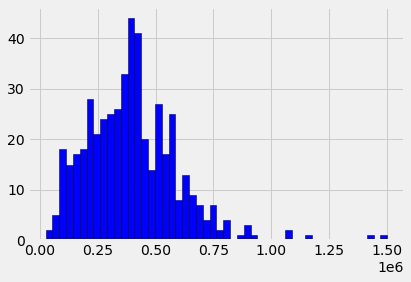

In [325]:
plt.hist(West_Hollywood_Sellers_df['LOANAMOUT1'][West_Hollywood_Sellers_df['LOANAMOUT1'] != 0], 
         color = 'blue', 
         edgecolor= 'black', 
         bins = 50)

(array([ 25., 118., 222., 211., 228., 281., 242., 284., 115., 131.,  76.,
         72.,  25.,  32.,  19.,  22.,   6.,   9.,  14.,   2.,   3.,   3.,
          1.,   1.,   1.,   0.,   1.,   0.,   1.,   0.,   0.,   0.,   2.,
          1.,   0.,   1.,   0.,   1.,   0.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,  14.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([1.5750000e+03, 5.4787800e+04, 1.0800060e+05, 1.6121340e+05,
        2.1442620e+05, 2.6763900e+05, 3.2085180e+05, 3.7406460e+05,
        4.2727740e+05, 4.8049020e+05, 5.3370300e+05, 5.8691580e+05,
        6.4012860e+05, 6.9334140e+05, 7.4655420e+05, 7.9976700e+05,
        8.5297980e+05, 9.0619260e+05, 9.594054

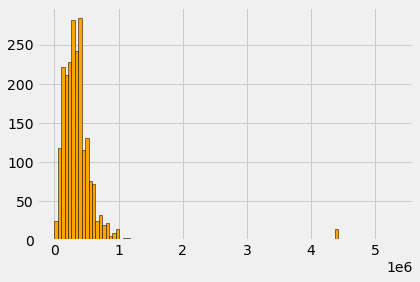

In [329]:
plt.hist(West_Hollywood_NonSellers_df['LOANAMOUT1'][West_Hollywood_NonSellers_df['LOANAMOUT1'] != 0], 
         color = 'orange', 
         edgecolor= 'black', 
         bins = 100)

Text(0.5, 1.0, 'Sellers vs Non-Sellers')

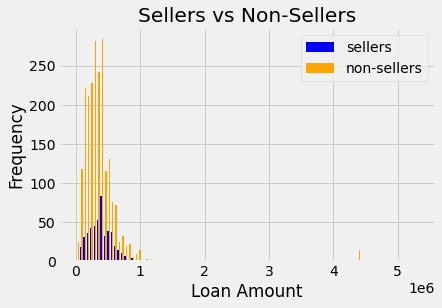

In [321]:
# Now do a side-by-side histogram

x1 = West_Hollywood_Sellers_df['LOANAMOUT1'][West_Hollywood_Sellers_df['LOANAMOUT1'] != 0]
x2 = West_Hollywood_NonSellers_df['LOANAMOUT1'][West_Hollywood_NonSellers_df['LOANAMOUT1'] != 0]

colors = ['blue', 'orange']
names = ['sellers', 'non-sellers']

plt.hist([x1, x2],
         bins = 100,
         #normed=True,
         color = colors,
         label=names)

plt.legend()
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.title('Sellers vs Non-Sellers')

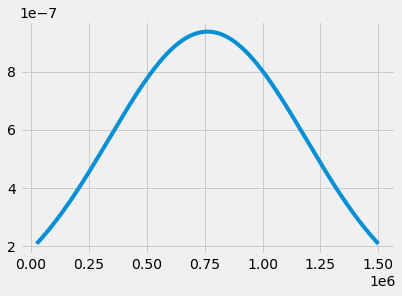

In [319]:
x_axis = np.arange(West_Hollywood_Sellers_df['LOANAMOUT1'][West_Hollywood_Sellers_df['LOANAMOUT1'] != 0].min(),
                   West_Hollywood_Sellers_df['LOANAMOUT1'].max(),
                   100)

mean = statistics.mean(x_axis)
sd = statistics.stdev(x_axis)

plt.plot(x_axis, norm.pdf(x_axis, mean, sd))
plt.show()

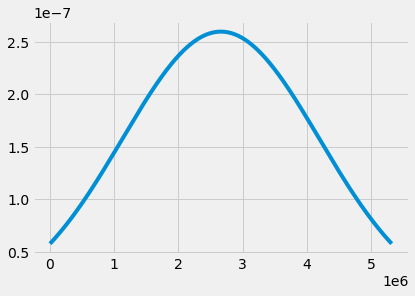

In [290]:
x_axis = np.arange(West_Hollywood_NonSellers_df['LOANAMOUT1'][West_Hollywood_NonSellers_df['LOANAMOUT1'] != 0].min(),
                   West_Hollywood_NonSellers_df['LOANAMOUT1'].max(),
                   100)

mean = statistics.mean(x_axis)
sd = statistics.stdev(x_axis)

plt.plot(x_axis, norm.pdf(x_axis, mean, sd))
plt.show()

In [301]:
non_sellers = West_Hollywood_NonSellers_df['LOANAMOUT1'][West_Hollywood_NonSellers_df['LOANAMOUT1'] != 0]
non_sellers

PARCEL
5554025186     417000
5555004108     772000
4340011022     820000
4340027180     968000
4392014188    1260000
               ...   
5560023113     278700
5554009037     150000
5560023079     378000
5554008098     220000
5554008097     128000
Name: LOANAMOUT1, Length: 2168, dtype: int64

In [302]:
sellers = West_Hollywood_Sellers_df['LOANAMOUT1'][West_Hollywood_Sellers_df['LOANAMOUT1'] != 0]
sellers

PARCEL
5554020145    417000
4339019046    417000
5554020065    112000
5555002055    390000
5555002064    453750
               ...  
4339017044    420000
5554021117    430000
5554021091     88000
4339017042    180000
5554010042    261750
Name: LOANAMOUT1, Length: 484, dtype: int64

/Users/Admin/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/Admin/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Density')

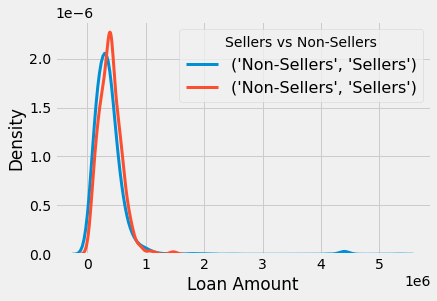

In [316]:
options = [non_sellers, sellers]
labels = 'Non-Sellers', 'Sellers'

for option in options:
    subset = option
    
    sns.distplot(subset, hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = label)
    
# Plot formatting
plt.legend(prop={'size': 16}, title = 'Sellers vs Non-Sellers')
#plt.title('Sellers vs Non-Sellers')
plt.xlabel('Loan Amount')
plt.ylabel('Density')